In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('drug200.csv', delimiter=',')
df.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC


In [3]:
df.shape

(200, 6)

In [3]:
df[df['Drug'] == 'drugY']

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
4,61,F,LOW,HIGH,18.043,drugY
6,49,F,NORMAL,HIGH,16.275,drugY
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY
...,...,...,...,...,...,...
188,65,M,HIGH,NORMAL,34.997,drugY
189,64,M,HIGH,NORMAL,20.932,drugY
190,58,M,HIGH,HIGH,18.991,drugY
192,72,M,LOW,HIGH,16.310,drugY


In [4]:
df.describe(include='O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [5]:
features = df.columns.to_list()
features.pop()
features

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [7]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df_sex = LabelEncoder()
df_sex.fit(['F', 'M'])
df_sex_transfromed = df_sex.transform(df['Sex'])

In [10]:
df_sex_transfromed.shape

(200,)

In [11]:
df['Sex'] = df_sex_transfromed

In [12]:
df.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC


In [13]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [39]:
df_bp = LabelEncoder()
df_bp.fit(['HIGH', 'LOW', 'NORMAL'])
df_bp_transformed = df_bp.transform(df['BP'])
df_bp_transformed[:5]

array([0, 1, 1, 2, 1])

In [40]:
df['BP'] = df_bp_transformed

In [41]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [16]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [17]:
chol_transformed = LabelEncoder().fit(['NORMAL', 'HIGH']).transform(df['Cholesterol'])

In [18]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [19]:
df.loc[:, 'Cholesterol'] = chol_transformed

In [20]:
df.Cholesterol.value_counts()

0    103
1     97
Name: Cholesterol, dtype: int64

In [21]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,0,25.355,drugY
1,47,1,LOW,0,13.093,drugC
2,47,1,LOW,0,10.114,drugC
3,28,0,NORMAL,0,7.798,drugX
4,61,0,LOW,0,18.043,drugY


In [22]:
df_test = LabelEncoder().fit_transform(df['Drug'])

In [23]:
df_test

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [63]:
features

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [30]:
df_sex = LabelEncoder().fit([''])

In [44]:
x = df[features]
y = df[['Drug']]

In [45]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [24]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(140, 5)   (140, 1)
(60, 5)   (60, 1)


#### Modeling 

In [47]:
drugtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugtree


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
drugtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
predictTree = drugtree.predict(x_test)

In [52]:
print(predictTree[:5])
print( y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
      Drug
40   drugY
51   drugX
139  drugX
197  drugX
170  drugX


In [53]:
from sklearn.metrics import accuracy_score

print('test accuracy score ', accuracy_score(y_test, drugtree.predict(x_test)))
print('train Accuracy score' , accuracy_score(y_train, drugtree.predict(x_train)))

test accuracy score  0.9833333333333333
train Accuracy score 1.0


In [54]:
from sklearn.tree import plot_tree

In [71]:
list(np.unique(y))

['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

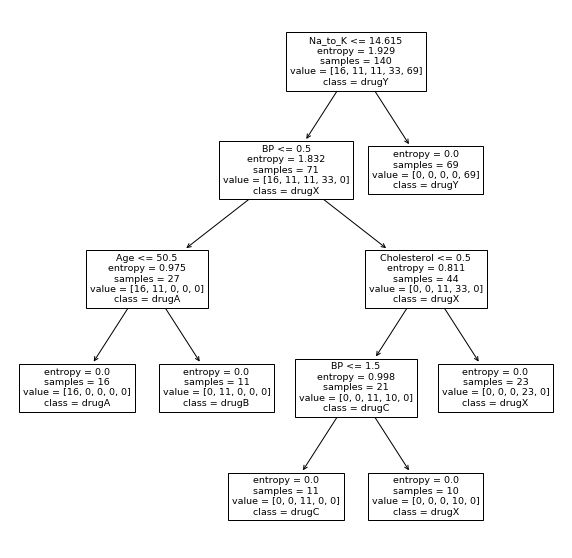

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
_ = plot_tree(drugtree, feature_names=features, class_names=list(np.unique(y)), impurity=True)